# CNN attempts by group 3

In [1]:
# import pandas as pd
# import torch
# import torchvision
# from torch import nn, optim
# from torch.utils.data import DataLoader, random_split
# from torchvision import transforms
# from torchvision.datasets import ImageFolder
# from torchvision.utils import make_grid
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

## Loading CIFAR 10 data set + preprocessing data

In [4]:
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
#encoding labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [7]:
 #Normalize data

x_train = x_train / 255
x_test = x_test / 255

### Data Augmentaion

In [ ]:
# Data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)  # Assuming x_train contains your training images

### Visualization

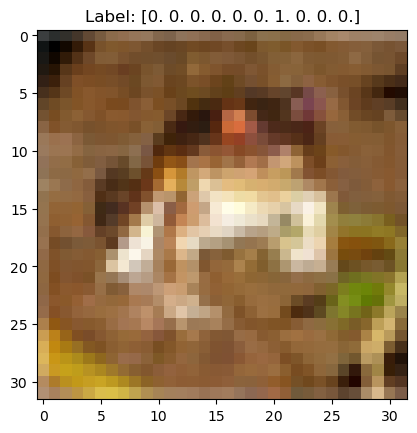

In [13]:
# Display the first image
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

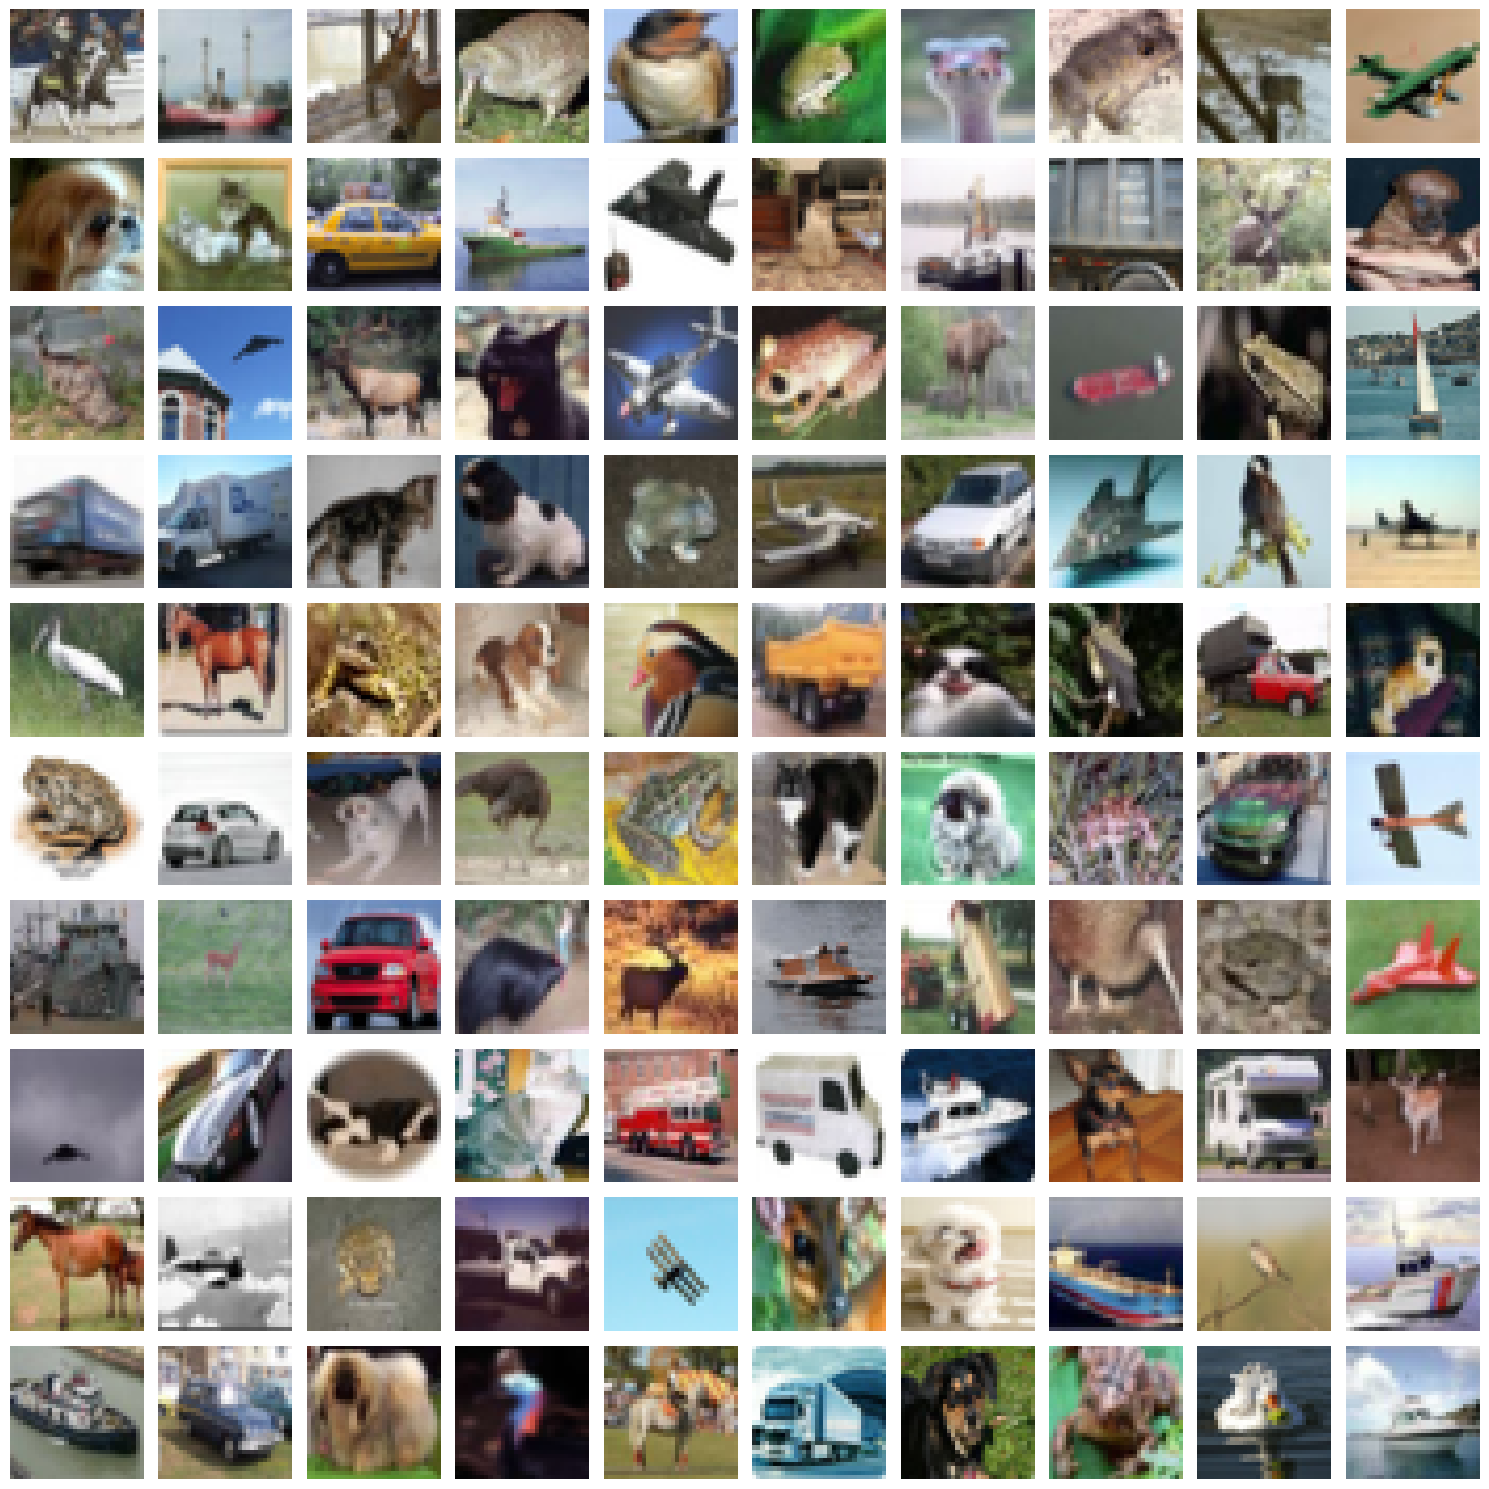

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Create a 10x10 grid
plt.figure(figsize=(15, 15))  # Set the figure size for better visibility

# Randomly select 100 indices
random_indices = np.random.choice(len(x_train), 100, replace=False)

for i, idx in enumerate(random_indices):
    plt.subplot(10, 10, i + 1)  # Create a 10x10 grid
    plt.imshow(x_train[idx], cmap=plt.get_cmap('gray'))  # Display a random image
    plt.axis('off')  # Turn off axes for cleaner visualization

plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()

## Model by Aurele - FAILED Accu

In [ ]:
from keras.backend import clear_session
clear_session()

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model3 = Sequential([
    # Block 1
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, kernel_size=(3, 3), activation="relu", padding="same"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),

    # Fully connected layers
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")  # 10 classes
])

model3.summary()


C:\Users\aurel\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       131,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,106 (1.04 MB)

 Trainable params: 271,658 (1.04 MB)

 Non-trainable params: 448 (1.75 KB)

In [17]:
# Your code here :

# compile model
model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Train on cifar-10
batch_size = 512
epochs = 70

# Train the model and store the history
history_aurele = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

"""
## Evaluate the trained model
"""

score = model3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])



Epoch 1/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 70s 676ms/step - accuracy: 0.1118 - loss: 2.6182 - val_accuracy: 0.1038 - val_loss: 4.5641
Epoch 2/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 59s 668ms/step - accuracy: 0.1888 - loss: 2.0856 - val_accuracy: 0.0938 - val_loss: 4.7454
Epoch 3/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 51s 585ms/step - accuracy: 0.2711 - loss: 1.9136 - val_accuracy: 0.0958 - val_loss: 4.6597
Epoch 4/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 55s 627ms/step - accuracy: 0.3530 - loss: 1.7140 - val_accuracy: 0.0990 - val_loss: 3.9987
Epoch 5/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 51s 578ms/step - accuracy: 0.4012 - loss: 1.5973 - val_accuracy: 0.2198 - val_loss: 2.6667
Epoch 6/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 52s 587ms/step - accuracy: 0.4366 - loss: 1.5005 - val_accuracy: 0.3522 - val_loss: 2.0993
Epoch 7/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 54s 610ms/step - accuracy: 0.4786 - loss: 1.4053 - val_accuracy: 0.4280 - val_loss: 1.7242
Epoch 8/70
88/88 ━━━━━━━━━━━━━━━━━━━━ 50s 570ms/step - accuracy: 0.5094 - loss: 1.3266 - val_accu

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt


# Plot the loss curve
plt.figure()
plt.plot(history_aurele.history['loss'], label='Training Loss')
plt.plot(history_aurele.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy curve
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history_aurele' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Predict the test set
y_pred_aur_prob = model3.predict(x_test)  # Predict probabilities
y_pred_aur = np.argmax(y_pred_aur_prob, axis=1)  # Convert probabilities to class labels

# Assuming y_test is in multilabel-indicator format, convert it to multiclass
# Replace this line with the appropriate conversion if y_test has a different format
y_test_multiclass = np.argmax(y_test, axis=1)  # Convert to multiclass if y_test is multilabel-indicator

# Step 2: Compute confusion matrix
# Use the converted y_test_multiclass instead of y_test
cm = confusion_matrix(y_test_multiclass, y_pred_aur)

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Step 3: Plot confusion matrix with word labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)  # Use class_names instead of numbers
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Evaluate the trained model

score = model3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

In [ ]:
# Precision, recall, F1 report

import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

metrics = precision_recall_fscore_support(y_test_multiclass, y_pred_aur, average=None)
report_df = pd.DataFrame({
    'Class': class_names,
    'Precision': metrics[0],
    'Recall': metrics[1],
    'F1-Score': metrics[2],
    'Support': metrics[3]
})
print(report_df)

## Model by Enrique

## Model by Paul